[ Info: Saved animation to /home/aime/Documentos/pet_pesquisa/programs/ferrofluid_simulation.gif


Plots.AnimatedGif("/home/aime/Documentos/pet_pesquisa/programs/ferrofluid_simulation.gif")
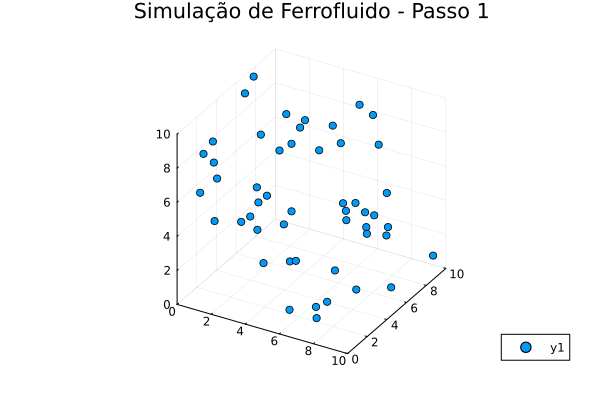

In [8]:
# Importar pacotes necessários
using Random
using LinearAlgebra
using Pkg

using Plots
gr()  # Define o backend padrão como GR para garantir compatibilidade

# Tornar a estrutura MagneticParticle mutável
mutable struct MagneticParticle
    position::Vector{Float64}  # Posição da partícula
    velocity::Vector{Float64}  # Velocidade da partícula
    mass::Float64              # Massa da partícula
    magnetic_moment::Vector{Float64}  # Momento magnético da partícula
end

# Função para gerar partículas com posições e velocidades aleatórias
function generate_particles(n, box_size)
    particles = []
    for i in 1:n
        position = rand(3) .* box_size
        velocity = rand(3) .* 0.1  # Velocidade inicial pequena
        mass = 1.0
        magnetic_moment = [0.0, 0.0, 1.0]  # Momento magnético fixo apontando para z
        push!(particles, MagneticParticle(position, velocity, mass, magnetic_moment))
    end
    return particles
end

# Campo magnético externo (pode ser alterado)
function external_magnetic_field(position)
    return [0.0, 0.0, 1.0]  # Campo constante na direção z
end

# Força magnética entre a partícula e o campo externo
function magnetic_force(particle, field)
    return cross(particle.magnetic_moment, field)
end

# Atualizar a posição e a velocidade das partículas (método de Euler)
function update_particles!(particles, dt, box_size)
    for particle in particles
        # Campo magnético externo no ponto atual
        B = external_magnetic_field(particle.position)
        
        # Calcular a força magnética
        F_mag = magnetic_force(particle, B)
        
        # Atualizar a velocidade: v = v + (F/m)*dt
        particle.velocity += (F_mag / particle.mass) * dt
        
        # Atualizar a posição: x = x + v*dt
        particle.position += particle.velocity * dt
        
        # Aplicar condições de contorno periódicas (mantém as partículas na caixa)
        particle.position .= mod.(particle.position, box_size)
    end
end

# Função para rodar a simulação e salvar vídeo e posições
function simulate_ferrofluid(n_particles, n_steps, dt, box_size, video_path, positions_file)
    # Gerar partículas
    particles = generate_particles(n_particles, box_size)
    
    # Abrir arquivo para salvar posições
    open(positions_file, "w") do file
        # Criar uma lista de frames para o vídeo
        anim = @animate for step in 1:n_steps
            update_particles!(particles, dt, box_size)
            
            # Coletar as posições das partículas
            x = [p.position[1] for p in particles]
            y = [p.position[2] for p in particles]
            z = [p.position[3] for p in particles]
            
            # Gravar as posições no arquivo .txt
            write(file, "Step $step\n")
            for p in particles
                write(file, "Particle position: $(p.position)\n")
            end
            write(file, "\n")
            
            # Atualizar o gráfico
            scatter(x, y, z, title="Simulação de Ferrofluido - Passo $step", xlim=(0, box_size), ylim=(0, box_size), zlim=(0, box_size))
        end
        
        # Salvar a animação como vídeo (GIF)
        gif(anim, video_path, fps=20)
    end
end

# Parâmetros da simulação
n_particles = 50    # Número de partículas
n_steps = 100       # Número de passos de simulação
dt = 0.1            # Passo de tempo
box_size = 10.0     # Tamanho da caixa de simulação

# Caminhos para salvar o vídeo e o arquivo de posições
video_path = "ferrofluid_simulation.gif"
positions_file = "particle_positions.txt"

# Rodar a simulação e salvar vídeo e posições
simulate_ferrofluid(n_particles, n_steps, dt, box_size, video_path, positions_file)
